D:\PycharmProjects\Interpritier\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


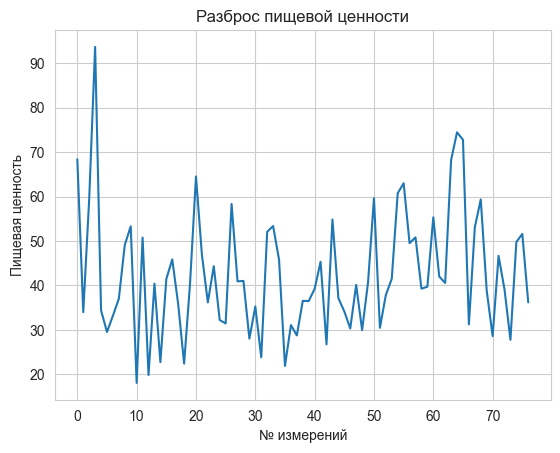

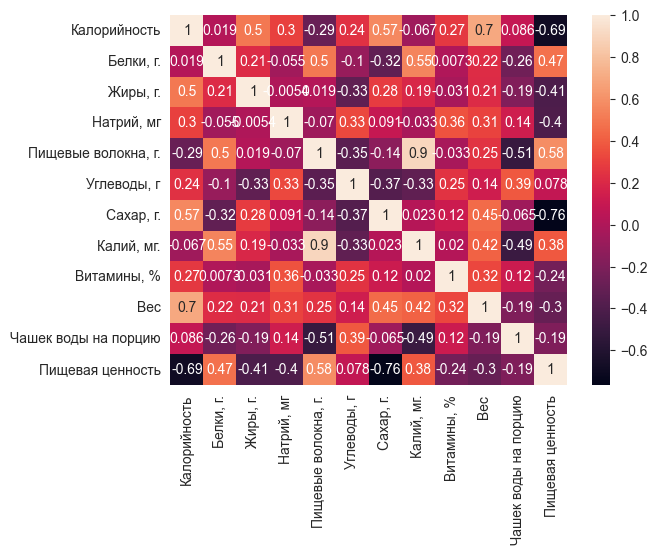

BIC= -94.7973044213723
*** Коэффициенты регрессии ***
Наклон линии(направление зависимости) =  [-0.28649474  0.23050877 -0.13211279 -0.31013911  0.59583924  0.27662219
 -0.27508075 -0.19800608 -0.07788405  0.02324764  0.00316074]
Изменение высоты относительно оси X) =  -0.00011841559066377849
Стандартная ошибка:  0.012033776419361217
Коэффициент детерминаци для обучающей выборки r^2 = 0.995
Коэффициент детерминаци для тестовой выборки r^2 = 0.999
Ошибка относительно среднего значения y = 0.22117836233365148
Регрессионная квадратичная сумма 32.11199835240587
Квадратичная сумма ошибки 0.031906214027070404
Общая квадратичная сумма 32.14390456643294
F-критерий 1097.9450868152358


C:\Users\cfifz\AppData\Local\Temp\ipykernel_13036\29761074.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Стандартная ошибка: ", ols_model_res.bse[-1])


<Figure size 1200x600 with 0 Axes>

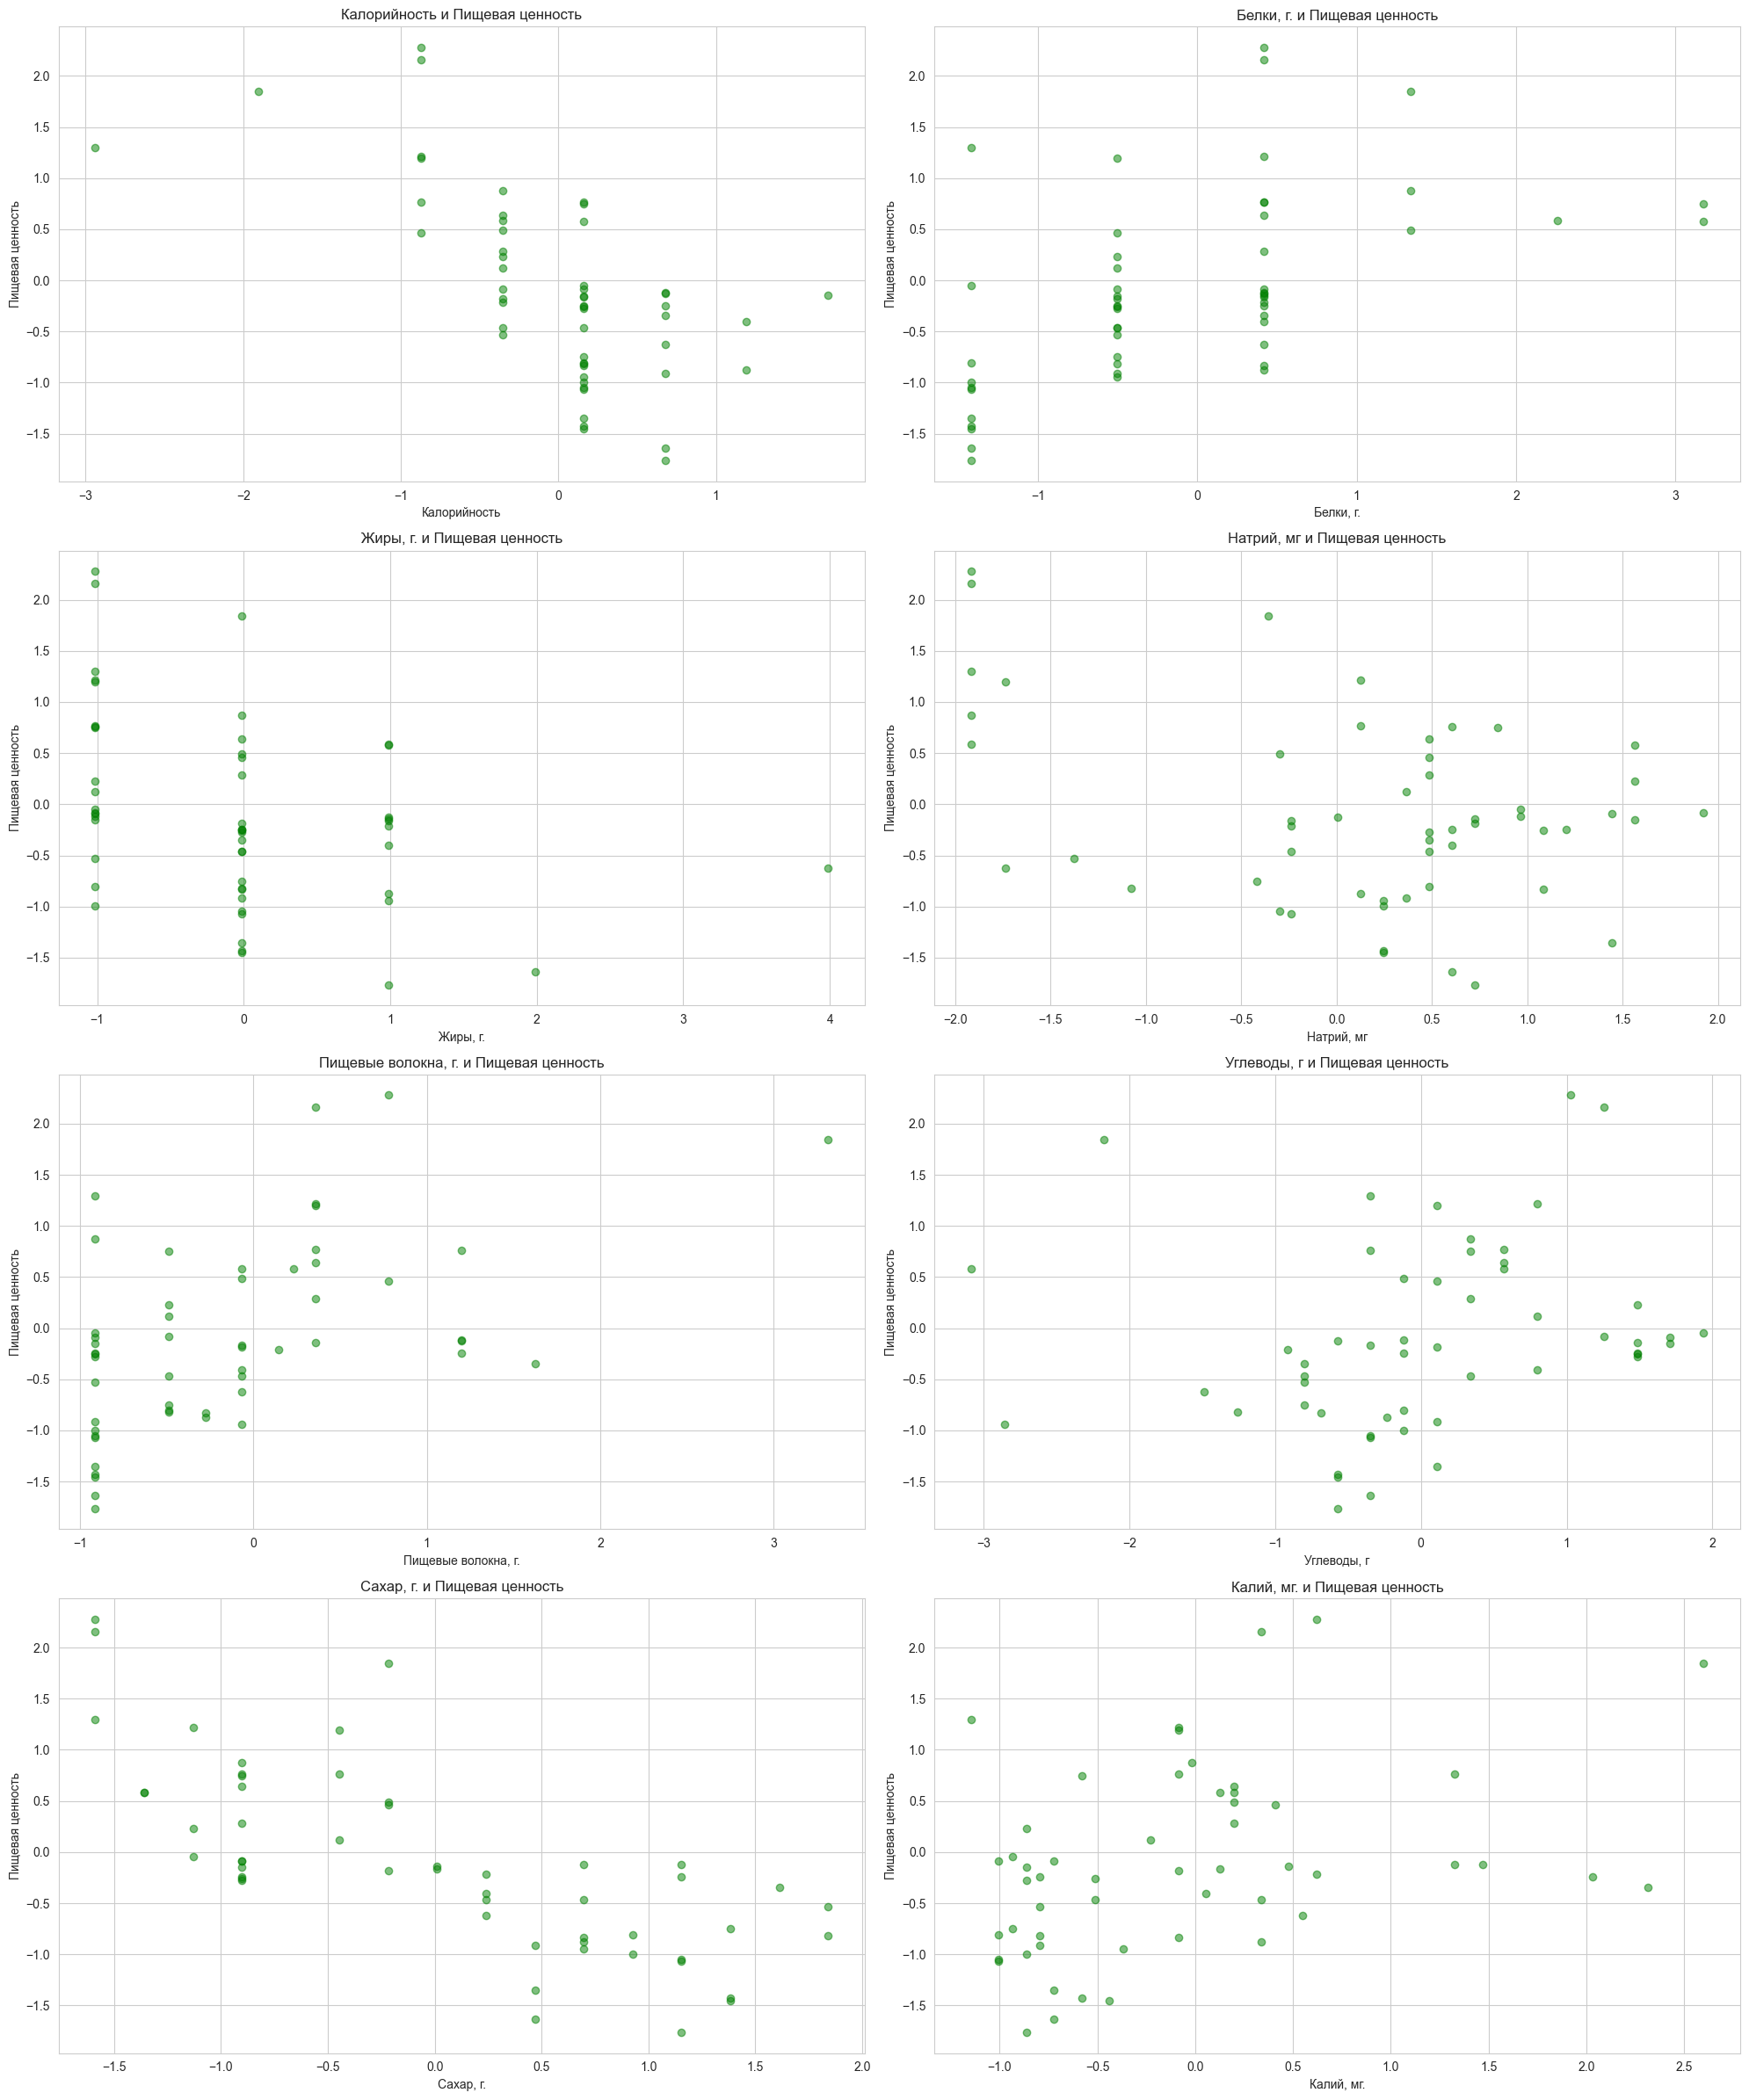

Коэффициент (№ переменной) 0: t-критерий = -189.679
Коэффициент (№ переменной) 1: t-критерий = 87.671
Коэффициент (№ переменной) 2: t-критерий = -67.160
Коэффициент (№ переменной) 3: t-критерий = -129.821
Коэффициент (№ переменной) 4: t-критерий = 340.476
Коэффициент (№ переменной) 5: t-критерий = 106.508
Коэффициент (№ переменной) 6: t-критерий = -131.552
Коэффициент (№ переменной) 7: t-критерий = -112.377
Коэффициент (№ переменной) 8: t-критерий = -44.491
Коэффициент (№ переменной) 9: t-критерий = 13.640
Коэффициент (№ переменной) 10: t-критерий = 1.391


In [9]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

excel = 'cereals.xlsx'
data = pd.read_excel(excel)
data = pd.read_csv('bebra.csv')
str_cols = data.select_dtypes(include=['object']).columns
df = data.drop(str_cols, axis=1)
# print(df.info())
plt.plot(data['Пищевая ценность'])
plt.title('Разброс пищевой ценности')
plt.ylabel('Пищевая ценность')
plt.xlabel('№ измерений')
plt.show()

correlation = df.corr()
col_names = df.columns
sns.heatmap(correlation, annot=True)
plt.show()
jokir = df
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=col_names)
# training
target_value = df['Пищевая ценность']
features = df.drop('Пищевая ценность', axis=1)
X = features
y = target_value
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)

# значения coef_ для каждой переменной

coefs = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])
X_incl_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_incl_const)
ols_model_res = ols_model.fit()
vif = [variance_inflation_factor(
    exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
pvalues = pd.DataFrame({'coef': ols_model_res.params,
                        'p-value': round(ols_model_res.pvalues, 3)})
pvalues['vif'] = vif  # меньше 10 норм
print('BIC=', ols_model_res.bic)
plt.figure(figsize=(12, 6))
y_pred = model.predict(X_test)

# Коэффициент детерминации r^2
# r_squared = r2_score(y_test, y_pred)
# print("Коэффициент детерминации (r^2): ", r_squared)
mean_y = np.mean(y_test)
SSR = np.sum((y_pred - mean_y) ** 2)  # регрессионная квадратичная сумма
SSE = np.sum((y_test - y_pred) ** 2)  # квадратичная сумма ошибки
SST = SSR + SSE  # общая квадратичная сумма
mse = mean_squared_error(y_pred, y_test)
n = X_test.shape[0]  # - число наблюдений
p = X_test.shape[1]
F = (SSR / p) / (SSE / (n - p - 1))
# metrics
print('*** Коэффициенты регрессии ***')

print('Наклон линии(направление зависимости) = ', model.coef_)
print('Изменение высоты относительно оси X) = ', model.intercept_)
print("Стандартная ошибка: ", ols_model_res.bse[-1])
print('Коэффициент детерминаци для обучающей выборки r^2 =',
      round(model.score(X_train, y_train), 3))  # r^2
print('Коэффициент детерминаци для тестовой выборки r^2 =',
      round(model.score(X_test, y_test), 3))
print('Ошибка относительно среднего значения y =', mean_y)
print('Регрессионная квадратичная сумма', SSR)
print('Квадратичная сумма ошибки', SSE)
print('Общая квадратичная сумма', SST)
print('F-критерий', F)

# Диаграммы разброса данных
plt.figure(figsize=(20, 24))
for i, col in enumerate(features.columns):
    if i < 8:
        plt.subplot(4, 2, i + 1)
        plt.scatter(X_train[col], y_train, color='green', alpha=0.5)
        plt.title(col + ' и Пищевая ценность')
        plt.xlabel(col)
        plt.ylabel('Пищевая ценность')
plt.tight_layout()
plt.show()

# T-тест
for i, coef in enumerate(model.coef_):
    X_i = X_test.iloc[:, i]
    se_b_i = np.sqrt(mse / (n - p - 1)) / np.sqrt(np.sum((X_i - np.mean(X_i)) ** 2))
    t_stat = coef / se_b_i
    # p_value = 2 * (1 - sm.t.cdf(abs(t_stat), df=n - p - 1))
    print(f"Коэффициент (№ переменной) {i}: t-критерий = {t_stat:.3f}")
